## Data import and preprocessing

In [2]:
#Importing the base libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib as mpl
mpl.style.use(['ggplot']) #use ggplot style

In [3]:
# Getting the raw data
df = pd.read_csv('housing.csv') # Notice: Raw data is in the Data folder
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
# Remove capped values of prices USD 500000
df=df[df['median_house_value'] < 490000]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
print('There are {} rows and {} columns in train'.format(df.shape[0],df.shape[1]))

There are 19608 rows and 10 columns in train


In [7]:
# As it was dsicussed in Part 1. Explanatory Data Analysis, it might be interesting to add the possibly helpful 
#attributes combinations and study their effect on modeling too

df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.199211,2.172269


## Handling categorical attributes

In [8]:
# Asssigning numerical values to ocean proximity in the gradient order: the lower the number the further away is the house from the ocean
# this gradient is chosen for the better and easier interpretation of models results (feature importances)

df.loc[df['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 4
df.loc[df['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 3
df.loc[df['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 2
df.loc[df['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 1
df.loc[df['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 0

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3,4.970588,0.199211,2.172269


## Data split

Now the data will be splitted in train and test set to avoid the data leakage and bias during the further preprocessing steps, which include cleaning the missing values and feature scaling.

In [9]:
# Splitting the data into training and testing sets.
train_set1, test_set1 = train_test_split(df, test_size=0.2, random_state=1)
print("Training Data", len(train_set1))
print("Testing Data", len(test_set1))

Training Data 15686
Testing Data 3922


## Data cleaning on train and test

Changing the missing values with the median on a train set.

In [10]:
# Observing missing values
missing_values_count = train_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(train_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes = train_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X = imputer.transform(housing_numerical_attributes)

Percent of data that is missing: 0.1431948136015457


Changing the missing values with the median (from a train set) on a test set.

In [11]:
# Observing missing values
missing_values_count = test_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(test_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes1 = test_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X1 = imputer.transform(housing_numerical_attributes1)

Percent of data that is missing: 0.21182285333228731


In [12]:
# Data with replaced NAN values.
# Put back the ocean proximity in train set
train_set = pd.DataFrame(X, columns = housing_numerical_attributes.columns, index = housing_numerical_attributes.index)

train_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,-115.57,32.79,50.0,1291.0,277.0,864.0,274.0,1.6667,68100.0,1,4.711679,0.214562,3.153285
17659,-121.88,37.28,33.0,2951.0,529.0,1288.0,521.0,4.1554,313100.0,2,5.664107,0.179261,2.472169
17654,-121.89,37.25,21.0,2080.0,352.0,1040.0,325.0,5.2887,264500.0,2,6.400000,0.169231,3.200000
17544,-121.87,37.34,52.0,1170.0,215.0,604.0,207.0,2.6667,325900.0,2,5.652174,0.183761,2.917874
8772,-118.34,33.80,33.0,2194.0,469.0,987.0,397.0,5.0951,318900.0,2,5.526448,0.213765,2.486146
561,-122.23,37.76,52.0,1705.0,246.0,658.0,253.0,5.7500,306300.0,3,6.739130,0.144282,2.600791
6286,-117.93,34.04,30.0,1336.0,239.0,905.0,253.0,4.8854,178100.0,2,5.280632,0.178892,3.577075
17656,-121.89,37.29,36.0,2959.0,529.0,1125.0,520.0,4.2614,268800.0,2,5.690385,0.178777,2.163462
16525,-121.20,37.79,36.0,866.0,160.0,502.0,149.0,2.4798,101500.0,1,5.812081,0.184758,3.369128
16361,-121.30,38.01,29.0,2289.0,449.0,1215.0,435.0,3.2788,100000.0,1,5.262069,0.196156,2.793103


In [13]:
# Data with replaced NAN values.
# Put back the ocean proximity in test set
test_set = pd.DataFrame(X1, columns = housing_numerical_attributes1.columns, index = housing_numerical_attributes1.index)

test_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11212,-117.91,33.82,29.0,1444.0,326.0,1038.0,271.0,2.3843,182900.0,2,5.328413,0.225762,3.830258
10317,-117.82,33.84,25.0,1788.0,203.0,676.0,217.0,10.1299,454300.0,2,8.239631,0.113535,3.115207
5086,-118.28,33.98,47.0,865.0,193.0,782.0,217.0,2.2411,93000.0,2,3.986175,0.223121,3.603687
7988,-118.18,33.85,38.0,3596.0,862.0,2416.0,832.0,3.6897,169800.0,2,4.322115,0.239711,2.903846
14480,-117.25,32.82,19.0,5255.0,762.0,1773.0,725.0,7.8013,474000.0,4,7.248276,0.145005,2.445517
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
3088,-118.23,35.48,17.0,2354.0,514.0,775.0,380.0,1.8369,59400.0,1,6.194737,0.218352,2.039474
9894,-122.30,38.29,40.0,1739.0,318.0,744.0,312.0,2.6518,156100.0,3,5.573718,0.182864,2.384615
8371,-118.34,33.98,45.0,1298.0,294.0,1064.0,268.0,3.7067,136600.0,2,4.843284,0.226502,3.970149
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,1,6.779070,0.169383,3.026163


## Feature Scaling

In [14]:
train_set_without_target = train_set.drop("median_house_value", axis=1) # drop labels for training set 
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,-115.57,32.79,50.0,1291.0,277.0,864.0,274.0,1.6667,1,4.711679,0.214562,3.153285
17659,-121.88,37.28,33.0,2951.0,529.0,1288.0,521.0,4.1554,2,5.664107,0.179261,2.472169
17654,-121.89,37.25,21.0,2080.0,352.0,1040.0,325.0,5.2887,2,6.400000,0.169231,3.200000
17544,-121.87,37.34,52.0,1170.0,215.0,604.0,207.0,2.6667,2,5.652174,0.183761,2.917874
8772,-118.34,33.80,33.0,2194.0,469.0,987.0,397.0,5.0951,2,5.526448,0.213765,2.486146
561,-122.23,37.76,52.0,1705.0,246.0,658.0,253.0,5.7500,3,6.739130,0.144282,2.600791
6286,-117.93,34.04,30.0,1336.0,239.0,905.0,253.0,4.8854,2,5.280632,0.178892,3.577075
17656,-121.89,37.29,36.0,2959.0,529.0,1125.0,520.0,4.2614,2,5.690385,0.178777,2.163462
16525,-121.20,37.79,36.0,866.0,160.0,502.0,149.0,2.4798,1,5.812081,0.184758,3.369128
16361,-121.30,38.01,29.0,2289.0,449.0,1215.0,435.0,3.2788,1,5.262069,0.196156,2.793103


In [15]:
test_set_without_target = test_set.drop("median_house_value", axis=1) # drop labels for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11212,-117.91,33.82,29.0,1444.0,326.0,1038.0,271.0,2.3843,2,5.328413,0.225762,3.830258
10317,-117.82,33.84,25.0,1788.0,203.0,676.0,217.0,10.1299,2,8.239631,0.113535,3.115207
5086,-118.28,33.98,47.0,865.0,193.0,782.0,217.0,2.2411,2,3.986175,0.223121,3.603687
7988,-118.18,33.85,38.0,3596.0,862.0,2416.0,832.0,3.6897,2,4.322115,0.239711,2.903846
14480,-117.25,32.82,19.0,5255.0,762.0,1773.0,725.0,7.8013,4,7.248276,0.145005,2.445517
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,6.281853,0.172096,2.181467
3088,-118.23,35.48,17.0,2354.0,514.0,775.0,380.0,1.8369,1,6.194737,0.218352,2.039474
9894,-122.30,38.29,40.0,1739.0,318.0,744.0,312.0,2.6518,3,5.573718,0.182864,2.384615
8371,-118.34,33.98,45.0,1298.0,294.0,1064.0,268.0,3.7067,2,4.843284,0.226502,3.970149
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,1,6.779070,0.169383,3.026163


In [16]:
# Creating pandas series full of zeros to store the standard deviation and the mean from the training set.
std_dev_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")
mean_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")

# Getting the values for the mean and standard deviation from the training dataset.
for col in train_set_without_target.columns:
    std_dev_tr[col]= train_set_without_target[col].std()
    mean_tr[col]= train_set_without_target[col].mean()
    # Changing the training data so it is normalized with the mean and standard deviation from the training set.
    train_set_without_target[col]=(train_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

for col in test_set_without_target.columns:
    # Changing the testing data so it is normalized with the mean and standard deviation from the training set.
    test_set_without_target[col]=(test_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

In [17]:
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292
561,-1.337423,0.983819,1.898615,-0.422709,-0.700348,-0.701712,-0.650768,1.338025,1.010828,0.639160,-1.243654,-0.043527
6286,0.809068,-0.745542,0.136134,-0.594003,-0.717137,-0.479886,-0.650768,0.783270,-0.021924,-0.036330,-0.633947,0.039630
17656,-1.167700,0.765325,0.616811,0.159413,-0.021575,-0.282309,0.050745,0.382891,-0.021924,0.153443,-0.635983,-0.080778
16525,-0.823263,0.997766,0.616811,-0.812183,-0.906618,-0.841812,-0.924016,-0.760242,-1.054676,0.209805,-0.530623,0.021917
16361,-0.873182,1.100040,0.056022,-0.151609,-0.213455,-0.201482,-0.172583,-0.247577,-1.054676,-0.044928,-0.329834,-0.027147


In [18]:
train_set_without_target.insert(12,"median_house_value",train_set["median_house_value"]) #Put back the target values for train set
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533,68100.0
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483,313100.0
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512,264500.0
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519,325900.0
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292,318900.0
561,-1.337423,0.983819,1.898615,-0.422709,-0.700348,-0.701712,-0.650768,1.338025,1.010828,0.639160,-1.243654,-0.043527,306300.0
6286,0.809068,-0.745542,0.136134,-0.594003,-0.717137,-0.479886,-0.650768,0.783270,-0.021924,-0.036330,-0.633947,0.039630,178100.0
17656,-1.167700,0.765325,0.616811,0.159413,-0.021575,-0.282309,0.050745,0.382891,-0.021924,0.153443,-0.635983,-0.080778,268800.0
16525,-0.823263,0.997766,0.616811,-0.812183,-0.906618,-0.841812,-0.924016,-0.760242,-1.054676,0.209805,-0.530623,0.021917,101500.0
16361,-0.873182,1.100040,0.056022,-0.151609,-0.213455,-0.201482,-0.172583,-0.247577,-1.054676,-0.044928,-0.329834,-0.027147,100000.0


In [19]:
train=train_set_without_target
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533,68100.0
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483,313100.0
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512,264500.0
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519,325900.0
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292,318900.0
561,-1.337423,0.983819,1.898615,-0.422709,-0.700348,-0.701712,-0.650768,1.338025,1.010828,0.639160,-1.243654,-0.043527,306300.0
6286,0.809068,-0.745542,0.136134,-0.594003,-0.717137,-0.479886,-0.650768,0.783270,-0.021924,-0.036330,-0.633947,0.039630,178100.0
17656,-1.167700,0.765325,0.616811,0.159413,-0.021575,-0.282309,0.050745,0.382891,-0.021924,0.153443,-0.635983,-0.080778,268800.0
16525,-0.823263,0.997766,0.616811,-0.812183,-0.906618,-0.841812,-0.924016,-0.760242,-1.054676,0.209805,-0.530623,0.021917,101500.0
16361,-0.873182,1.100040,0.056022,-0.151609,-0.213455,-0.201482,-0.172583,-0.247577,-1.054676,-0.044928,-0.329834,-0.027147,100000.0


In [20]:
test_set_without_target.insert(12,"median_house_value",test_set["median_house_value"]) #Put back the target values for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
11212,0.819052,-0.847816,0.056022,-0.543869,-0.508469,-0.360442,-0.603475,-0.821518,-0.021924,-0.014201,0.191714,0.061195,182900.0
10317,0.863978,-0.838518,-0.264429,-0.384179,-0.803483,-0.685546,-0.745354,4.148312,-0.021924,1.334104,-1.785296,0.000289,454300.0
5086,0.634354,-0.773435,1.498051,-0.812648,-0.827468,-0.590350,-0.745354,-0.913400,-0.021924,-0.635847,0.145201,0.041896,93000.0
7988,0.684272,-0.833869,0.777036,0.455117,0.777122,0.877110,0.870491,0.016069,-0.021924,-0.480259,0.437442,-0.017714,169800.0
14480,1.148513,-1.312698,-0.745106,1.225246,0.537273,0.299646,0.589360,2.654206,2.043580,0.874967,-1.230914,-0.056753,474000.0
4,-1.347407,1.025659,1.898615,-0.458918,-0.618799,-0.785233,-0.635003,0.116485,1.010828,0.427376,-0.753672,-0.079244,342200.0
3088,0.659313,-0.076112,-0.905331,-0.121435,-0.057553,-0.596637,-0.317089,-1.172748,-1.054676,0.387029,0.061178,-0.091339,59400.0
9894,-1.372366,1.230207,0.937262,-0.406926,-0.527657,-0.624477,-0.495752,-0.649881,1.010828,0.099410,-0.563984,-0.061940,156100.0
8371,0.604403,-0.773435,1.337825,-0.611644,-0.585220,-0.337092,-0.611357,0.026977,-0.021924,-0.238885,0.204760,0.073111,136600.0
20634,-1.002970,1.685791,-0.024091,-0.131648,-0.342973,-0.357748,-0.411675,0.030699,-1.054676,0.657658,-0.801472,-0.007295,116800.0


In [21]:
test=test_set_without_target
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
11212,0.819052,-0.847816,0.056022,-0.543869,-0.508469,-0.360442,-0.603475,-0.821518,-0.021924,-0.014201,0.191714,0.061195,182900.0
10317,0.863978,-0.838518,-0.264429,-0.384179,-0.803483,-0.685546,-0.745354,4.148312,-0.021924,1.334104,-1.785296,0.000289,454300.0
5086,0.634354,-0.773435,1.498051,-0.812648,-0.827468,-0.590350,-0.745354,-0.913400,-0.021924,-0.635847,0.145201,0.041896,93000.0
7988,0.684272,-0.833869,0.777036,0.455117,0.777122,0.877110,0.870491,0.016069,-0.021924,-0.480259,0.437442,-0.017714,169800.0
14480,1.148513,-1.312698,-0.745106,1.225246,0.537273,0.299646,0.589360,2.654206,2.043580,0.874967,-1.230914,-0.056753,474000.0
4,-1.347407,1.025659,1.898615,-0.458918,-0.618799,-0.785233,-0.635003,0.116485,1.010828,0.427376,-0.753672,-0.079244,342200.0
3088,0.659313,-0.076112,-0.905331,-0.121435,-0.057553,-0.596637,-0.317089,-1.172748,-1.054676,0.387029,0.061178,-0.091339,59400.0
9894,-1.372366,1.230207,0.937262,-0.406926,-0.527657,-0.624477,-0.495752,-0.649881,1.010828,0.099410,-0.563984,-0.061940,156100.0
8371,0.604403,-0.773435,1.337825,-0.611644,-0.585220,-0.337092,-0.611357,0.026977,-0.021924,-0.238885,0.204760,0.073111,136600.0
20634,-1.002970,1.685791,-0.024091,-0.131648,-0.342973,-0.357748,-0.411675,0.030699,-1.054676,0.657658,-0.801472,-0.007295,116800.0


## Modeling

In [22]:
# First, we will split between features and target value (labels) for train set

housing = train.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train["median_house_value"].copy()

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2736,1.987142,-1.326644,1.738389,-0.614893,-0.625995,-0.516708,-0.595592,-1.281953,-1.054676,-0.299836,-0.005576,0.003533
17659,-1.162709,0.760676,0.376473,0.155700,-0.021575,-0.135922,0.053373,0.314878,-0.021924,0.141273,-0.627446,-0.054483
17654,-1.167700,0.746729,-0.584880,-0.248629,-0.446108,-0.358646,-0.461596,1.042040,-0.021924,0.482095,-0.804145,0.007512
17544,-1.157717,0.788569,1.898615,-0.671063,-0.774701,-0.750208,-0.771628,-0.640321,-0.021924,0.135746,-0.548183,-0.016519
8772,0.604403,-0.857113,0.376473,-0.195709,-0.165485,-0.406244,-0.272424,0.917820,-0.021924,0.077517,-0.019626,-0.053292
561,-1.337423,0.983819,1.898615,-0.422709,-0.700348,-0.701712,-0.650768,1.338025,1.010828,0.639160,-1.243654,-0.043527
6286,0.809068,-0.745542,0.136134,-0.594003,-0.717137,-0.479886,-0.650768,0.783270,-0.021924,-0.036330,-0.633947,0.039630
17656,-1.167700,0.765325,0.616811,0.159413,-0.021575,-0.282309,0.050745,0.382891,-0.021924,0.153443,-0.635983,-0.080778
16525,-0.823263,0.997766,0.616811,-0.812183,-0.906618,-0.841812,-0.924016,-0.760242,-1.054676,0.209805,-0.530623,0.021917
16361,-0.873182,1.100040,0.056022,-0.151609,-0.213455,-0.201482,-0.172583,-0.247577,-1.054676,-0.044928,-0.329834,-0.027147


In [23]:
housing_labels

2736      68100.0
17659    313100.0
17654    264500.0
17544    325900.0
8772     318900.0
561      306300.0
6286     178100.0
17656    268800.0
16525    101500.0
16361    100000.0
10262    272200.0
2630      58100.0
7124     171100.0
10509    318300.0
1984     141400.0
4728     322600.0
6332     325000.0
16433    202800.0
5217      87500.0
992      125000.0
1943     207600.0
6297     226200.0
14439    276300.0
4486     137500.0
12107    133500.0
7898     293700.0
11232    183400.0
1153     142300.0
6188     160700.0
13741    182400.0
           ...   
2591      82100.0
10044    160100.0
3642     170700.0
20281    181100.0
4518     147200.0
1043     114200.0
6556     483300.0
1122     104900.0
19286    144000.0
12368    285000.0
18035    281200.0
20465    188000.0
17841    245800.0
4896      99200.0
8845     375000.0
19914     82800.0
2992      53300.0
13273    243900.0
3493     226700.0
11609    353500.0
8070     418600.0
17200    438400.0
145      296400.0
20299    215200.0
8132     2

In [24]:
# Second, we will split between features and target value (labels) for test set

housing_t = test.drop("median_house_value", axis=1) # drop labels for test set
housing_labels_t = test["median_house_value"].copy()

housing_t

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
11212,0.819052,-0.847816,0.056022,-0.543869,-0.508469,-0.360442,-0.603475,-0.821518,-0.021924,-0.014201,0.191714,0.061195
10317,0.863978,-0.838518,-0.264429,-0.384179,-0.803483,-0.685546,-0.745354,4.148312,-0.021924,1.334104,-1.785296,0.000289
5086,0.634354,-0.773435,1.498051,-0.812648,-0.827468,-0.590350,-0.745354,-0.913400,-0.021924,-0.635847,0.145201,0.041896
7988,0.684272,-0.833869,0.777036,0.455117,0.777122,0.877110,0.870491,0.016069,-0.021924,-0.480259,0.437442,-0.017714
14480,1.148513,-1.312698,-0.745106,1.225246,0.537273,0.299646,0.589360,2.654206,2.043580,0.874967,-1.230914,-0.056753
4,-1.347407,1.025659,1.898615,-0.458918,-0.618799,-0.785233,-0.635003,0.116485,1.010828,0.427376,-0.753672,-0.079244
3088,0.659313,-0.076112,-0.905331,-0.121435,-0.057553,-0.596637,-0.317089,-1.172748,-1.054676,0.387029,0.061178,-0.091339
9894,-1.372366,1.230207,0.937262,-0.406926,-0.527657,-0.624477,-0.495752,-0.649881,1.010828,0.099410,-0.563984,-0.061940
8371,0.604403,-0.773435,1.337825,-0.611644,-0.585220,-0.337092,-0.611357,0.026977,-0.021924,-0.238885,0.204760,0.073111
20634,-1.002970,1.685791,-0.024091,-0.131648,-0.342973,-0.357748,-0.411675,0.030699,-1.054676,0.657658,-0.801472,-0.007295


In [25]:
housing_labels_t

11212    182900.0
10317    454300.0
5086      93000.0
7988     169800.0
14480    474000.0
4        342200.0
3088      59400.0
9894     156100.0
8371     136600.0
20634    116800.0
12262     74000.0
15039    241400.0
14444    227800.0
11963     92000.0
8980     275000.0
17582    247900.0
1727      68600.0
12529    108800.0
3502     158100.0
3279      86500.0
5874     226900.0
6143     159700.0
15341    152100.0
11340    162800.0
14234    135000.0
18956     94200.0
13651     88300.0
12244     85700.0
7953     181800.0
11668    188000.0
           ...   
9741     255200.0
17386    110300.0
6805     183100.0
9198     106500.0
7808     185600.0
8295     400000.0
9189     162500.0
3105     105300.0
6351     219400.0
19496    138100.0
13622     70200.0
14575    362500.0
18411    195000.0
5012     188500.0
5958     209400.0
20073    104800.0
11440    269800.0
8010     213600.0
2173      74700.0
3636     172700.0
8492     224100.0
3708     171600.0
14089    204400.0
2460      75000.0
17134    3

### Random Forest

In [26]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf=RandomForestRegressor()
rf_model=rf.fit(housing, housing_labels)

C:\Users\isifl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
rf_model.score(housing_t, housing_labels_t)

0.776834980528717

In [31]:
# Prediction using the testing dataset.
housing_labels_prediction=rf_model.predict(housing_t)

## Evaluating the error

In [30]:
# First import what is needed to evaluate the error.
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [35]:
# Getting the Mean Absolute Error
MAE= mean_absolute_error(housing_labels_prediction,housing_labels_t)
# # Getting the Mean Squared Error
MSE= mean_squared_error(housing_labels_prediction,housing_labels_t)
# Displaying the obtained values for the errors.
print("MAE is: ", MAE, "MSE is: " ,MSE)
# Because the values of MSE are squared, the square root is taken to facilitate the understanding of the value. This way the RMSE is obtained.
# Root Mean Squared Error
RMSE=np.sqrt(MSE)
print("RMSE is: ", RMSE)

MAE is:  30780.28324834268 MSE is:  2086866168.2756631
RMSE is:  45682.230333858075


In [50]:
import sklearn
# Options for scoring.
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [58]:
# Using cross_val_score with MSE for uncapped data.

from sklearn.model_selection import cross_val_score
# What do I put for scoring? Did the rest also use cv=10?

neg_scores_uncapped=cross_val_score(rf,housing, housing_labels,scoring="neg_mean_squared_error", cv=10)

# Because I was only able to get the negative values using the options above, I added a -
# Also, because is the Mean SQUARED Error, I used the square root.
scores_uncapped_MSE=np.sqrt(-(neg_scores_uncapped))
print("scores: ", scores_uncapped_MSE)
print("scores mean: ", scores_uncapped_MSE.mean())
print("scores standard deviation: ", scores_uncapped_MSE.std())

scores:  [48036.01541483 43775.26300453 47243.58997732 47379.04139936
 47440.49019356 48920.58269956 46204.5715278  44059.26880808
 48877.899227   48148.33727265]
scores mean:  47008.505952468964
scores standard deviation:  1722.8755465627785


In [103]:
# Using cross_val_score with MAE for uncapped data.

# What do I put for scoring? Did the rest also use cv=10?

neg_scores_uncapped=cross_val_score(rf,housing, housing_labels,scoring="neg_mean_absolute_error", cv=10)

# Because I was only able to get the negative values using the options above, I added a -
scores_uncapped_MAE=(-(neg_scores_uncapped))
print("scores: ", scores_uncapped_MAE)
print("scores mean: ", scores_uncapped_MAE.mean())
print("scores standard deviation: ", scores_uncapped_MAE.std())

scores:  [32690.15997451 32219.66214149 32022.84270236 32025.6471638
 32082.08413002 32330.4665392  31867.56377551 30852.33431122
 32959.64904337 31215.55491071]
scores mean:  32026.59646921866
scores standard deviation:  592.0794119328534


## Tunning

In [80]:
# Tune model with GridSearchCV:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
grid_search = GridSearchCV(rf, param_grid, cv=5,
 scoring='neg_mean_squared_error', # results change when this is MAE. We are using MSE
return_train_score=True)
grid_search.fit(housing, housing_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

In [81]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [82]:
final_model_uncapped=grid_search.best_estimator_

In [83]:
final_predictions_uncapped=final_model_uncapped.predict(housing_t)

In [84]:
# Getting the Mean Absolute Error
MAE_final= mean_absolute_error(final_predictions_uncapped,housing_labels_t)
# # Getting the Mean Squared Error
MSE_final= mean_squared_error(final_predictions_uncapped,housing_labels_t)
# Displaying the obtained values for the errors.
print("MAE is: ", MAE_final, "MSE is: " ,MSE_final)
# Because the values of MSE are squared, the square root is taken to facilitate the understanding of the value. This way the RMSE is obtained.
# Root Mean Squared Error
RMSE_final=np.sqrt(MSE_final)
print("RMSE is: ", RMSE_final)

MAE is:  29788.129644739078 MSE is:  1908473772.6200395
RMSE is:  43686.08213859466


In [106]:
rf_best_model=final_model_uncapped.fit(housing, housing_labels)
rf_best_model.score(housing_t, housing_labels_t)

0.7908718742993254

In [107]:
# Using cross_val_score with MAE for uncapped data.

# What do I put for scoring? Did the rest also use cv=10?

neg_scores_uncapped=cross_val_score(final_model_uncapped,housing, housing_labels,scoring="neg_mean_absolute_error", cv=10)

# Because I was only able to get the negative values using the options above, I added a -
final_scores_uncapped_MAE=(-(neg_scores_uncapped))
print("scores: ", final_scores_uncapped_MAE)
print("scores mean: ", final_scores_uncapped_MAE.mean())
print("scores standard deviation: ", final_scores_uncapped_MAE.std())

scores:  [30904.55963459 30164.51017633 31362.05224134 30826.53061398
 31086.31827066 32094.84085405 30232.6065051  29788.87969813
 31858.50123299 30681.20306122]
scores mean:  30900.00022883986
scores standard deviation:  697.7688998663726


In [105]:
# Using cross_val_score with MSE for uncapped data.

from sklearn.model_selection import cross_val_score
# What do I put for scoring? Did the rest also use cv=10?

neg_scores_uncapped=cross_val_score(final_model_uncapped,housing, housing_labels,scoring="neg_mean_squared_error", cv=10)

# Because I was only able to get the negative values using the options above, I added a -
# Also, because is the Mean SQUARED Error, I used the square root.
final_scores_uncapped_MSE=np.sqrt(-(neg_scores_uncapped))
print("scores: ", final_scores_uncapped_MSE)
print("scores mean: ", final_scores_uncapped_MSE.mean())
print("scores standard deviation: ", final_scores_uncapped_MSE.std())

scores:  [46138.88004911 43558.87058927 45339.90544029 46005.89646057
 45180.26339687 46881.36747704 44096.06439965 43059.9928473
 47995.91435504 45035.14248369]
scores mean:  45329.22974988303
scores standard deviation:  1433.4171226594904


## Feature Importance

In [94]:
# Feature importances.
features=housing.columns
importances=final_model_uncapped.feature_importances_
# Display features and their importances better using pandas.
combined=pd.Series(importances, features)
combined

longitude                   0.085939
latitude                    0.083512
housing_median_age          0.040034
total_rooms                 0.021249
total_bedrooms              0.020573
population                  0.021685
households                  0.021321
median_income               0.292467
ocean_proximity             0.174512
rooms_per_household         0.046842
bedrooms_per_room           0.082622
population_per_household    0.109244
dtype: float64

In [96]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

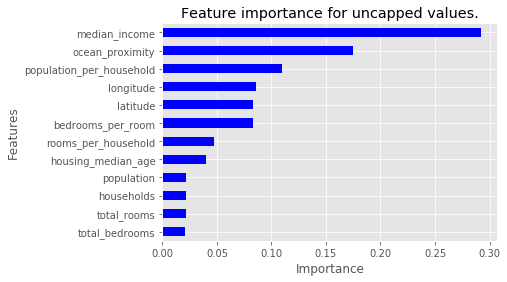

In [101]:
figure()
# Creating a horizontal graph with the values from the pandas Series.
combined.sort_values().plot.barh(color="blue")
plt.title("Feature importance for uncapped values.")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()